# Retention Time Prediction


This notebook is prepared to be run in Google [Colaboratory](https://colab.research.google.com/). In order to train the model faster, please change the runtime of Colab to use Hardware Accelerator, either GPU or TPU.

This notebook presents a short analysis of the Loss functions task where we  train the model with different Loss functions and analyze the results to decide which loss function works best with such a task.

In [1]:
# install the dlpro package in the current environment using pip

!python -m pip install -q git+https://github.com/wilhelm-lab/dlomix.git

The available modules in the framework are as follows:

In [2]:
import numpy as np
import pandas as pd
import dlomix

## 1. Load Data

In [3]:
from dlomix.data.RetentionTimeDataset import RetentionTimeDataset

In [4]:
TRAIN_DATAPATH = 'https://raw.githubusercontent.com/wilhelm-lab/dlomix/develop/example_dataset/proteomTools_train_val.csv'
BATCH_SIZE = 64

rtdata = RetentionTimeDataset(data_source=TRAIN_DATAPATH,
                              seq_length=30, batch_size=BATCH_SIZE, val_ratio=0.2, test=False)

Now we have an RT dataset that can be used directly with standard or custom `Keras` models. This wrapper contains the splits we chose when creating it. In our case, they are training and validation splits. To get the TF Dataset, we call the attributes `.train_data` and `.val_data`.

In [5]:
len(rtdata.train_data)

424

In [6]:
len(rtdata.val_data)

106

## 2. Training

### Model Architecture
Similar to the initial notebook we will initialize our model and train it.
Use train_model method with different varaibles to change model architecture and see which will be the best for our problem.

In [7]:
from dlomix.models.base import RetentionTimePredictor
import tensorflow as tf
from dlomix.eval.rt_eval import TimeDeltaMetric

In [8]:
def train_model(embedding_dim=16, encoder='conv1d'):
  model = RetentionTimePredictor(seq_length=30, embedding_dim= embedding_dim, encoder= encoder)
  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, decay=1e-7)

  # compile the model  with the optimizer and the metrics we want to use, we can add our customer delta95 metric

  model.compile(optimizer=optimizer, 
                loss='mse',
                metrics=['mean_absolute_error', TimeDeltaMetric(rtdata.data_mean, rtdata.data_std)])
  history = model.fit(rtdata.train_data,
                    validation_data=rtdata.val_data,
                    epochs=15)
  return history,model

In [10]:
embedding_dims = [1,10,15,25]
encoder_type = ['lstm', 'conv1d']
history_arc = []
model_arc = []
print('Embedding Training')
print('\n')
for embedding_dim in embedding_dims:
  print(embedding_dim)
  history, model = train_model(embedding_dim= embedding_dim)
  history_arc.append(history)
  model_arc.append(model)  
  print('\n')
print('Encoders Training')
print('\n')
for encoder in encoder_type:
  print(encoder)
  history, model = train_model(encoder= encoder)
  history_arc.append(history)
  model_arc.append(model)
  print('\n')

Embedding Training


1
Epoch 1/15
424/424 [==============================] - 40s 18ms/step - loss: 2657.1196 - mean_absolute_error: 41.9936 - timedelta: 43.7682 - val_loss: 2108.6096 - val_mean_absolute_error: 38.4104 - val_timedelta: 36.6566
Epoch 2/15
424/424 [==============================] - 8s 18ms/step - loss: 1829.1508 - mean_absolute_error: 35.3930 - timedelta: 36.8961 - val_loss: 1325.8557 - val_mean_absolute_error: 30.1061 - val_timedelta: 27.5219
Epoch 3/15
424/424 [==============================] - 8s 18ms/step - loss: 691.7972 - mean_absolute_error: 20.7424 - timedelta: 21.5158 - val_loss: 328.5018 - val_mean_absolute_error: 14.1590 - val_timedelta: 12.0626
Epoch 4/15
424/424 [==============================] - 8s 18ms/step - loss: 279.3627 - mean_absolute_error: 12.8946 - timedelta: 13.5303 - val_loss: 249.2827 - val_mean_absolute_error: 12.0229 - val_timedelta: 10.7442
Epoch 5/15
424/424 [==============================] - 8s 18ms/step - loss: 231.1236 - mean_absolute_erro

## 3. Analysis

### A. Embeddings

In [15]:
from dlomix.reports.RetentionTimeReport import RetentionTimeReport

#### Embedding output dimensions = 1

In [16]:
report = RetentionTimeReport(output_path="./output", history=history_arc[0])

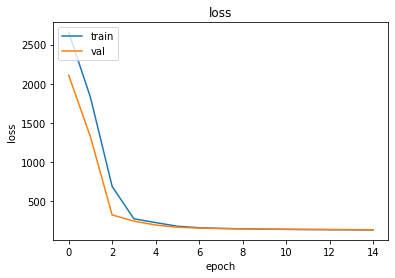

In [17]:
report.plot_keras_metric("loss")

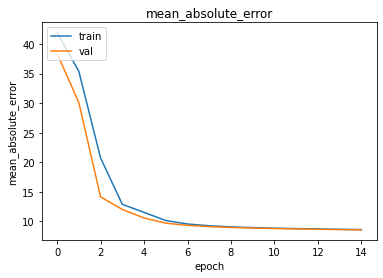

In [18]:
report.plot_keras_metric("mean_absolute_error")

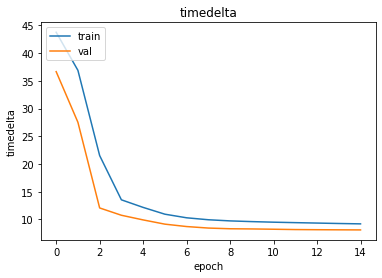

In [19]:
report.plot_keras_metric("timedelta")

#### Embedding output dimensions = 10

In [23]:
report = RetentionTimeReport(output_path="./output", history=history_arc[1])

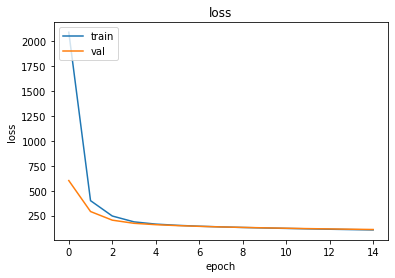

In [24]:
report.plot_keras_metric("loss")

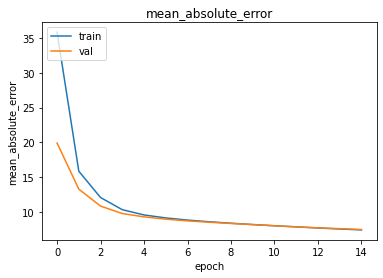

In [25]:
report.plot_keras_metric("mean_absolute_error")

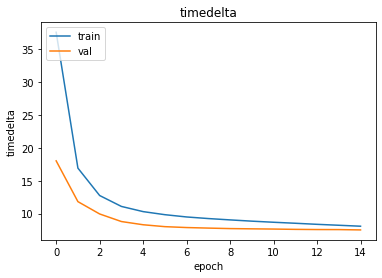

In [26]:
report.plot_keras_metric("timedelta")

#### Embedding output dimensions = 15

In [27]:
report = RetentionTimeReport(output_path="./output", history=history_arc[2])

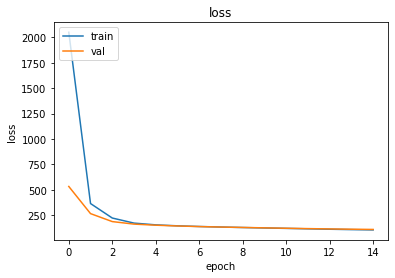

In [28]:
report.plot_keras_metric("loss")

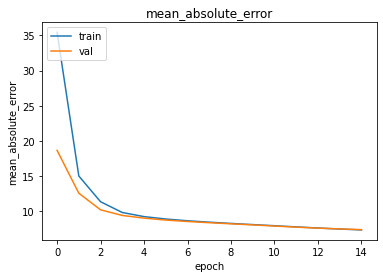

In [29]:
report.plot_keras_metric("mean_absolute_error")

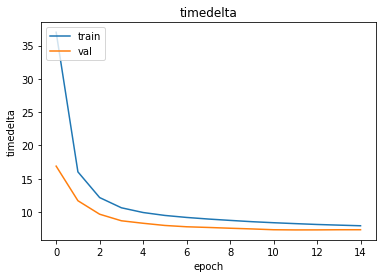

In [30]:
report.plot_keras_metric("timedelta")

#### Embedding output dimensions = 25

In [31]:
report = RetentionTimeReport(output_path="./output", history=history_arc[3])

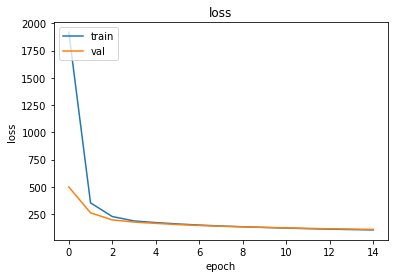

In [32]:
report.plot_keras_metric("loss")

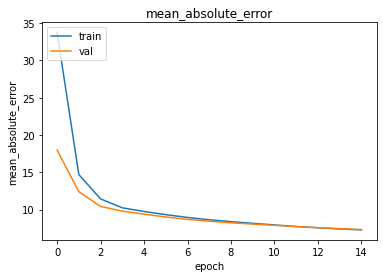

In [33]:
report.plot_keras_metric("mean_absolute_error")

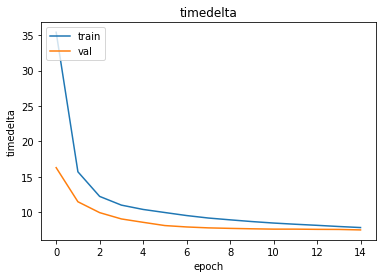

In [34]:
report.plot_keras_metric("timedelta")

### B. Model Architecture

#### LSTM Network

In [35]:
report = RetentionTimeReport(output_path="./output", history=history_arc[4])

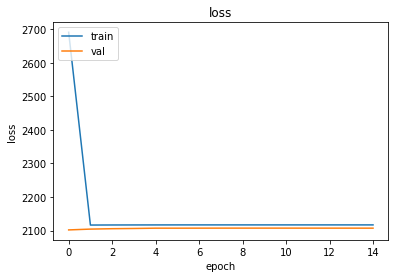

In [36]:
report.plot_keras_metric("loss")

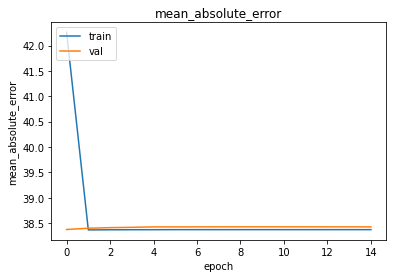

In [37]:
report.plot_keras_metric("mean_absolute_error")

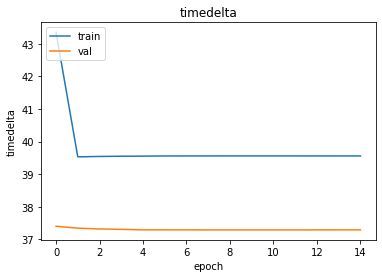

In [38]:
report.plot_keras_metric("timedelta")

In [12]:
model_arc[4].summary()

Model: "retention_time_predictor_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
string_lookup_4 (StringLooku multiple                  0         
_________________________________________________________________
embedding_4 (Embedding)      multiple                  352       
_________________________________________________________________
sequential_8 (Sequential)    (None, 256)               804864    
_________________________________________________________________
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
sequential_9 (Sequential)    (None, 64)                41152     
_________________________________________________________________
dense_14 (Dense)             multiple                  65        
Total params: 846,433
Trainable params: 846,433
Non-trainable params: 0
__________________________________

#### Convolutional Network

In [39]:
report = RetentionTimeReport(output_path="./output", history=history_arc[5])

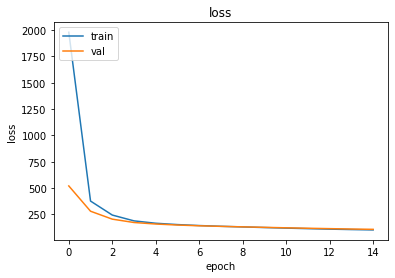

In [40]:
report.plot_keras_metric("loss")

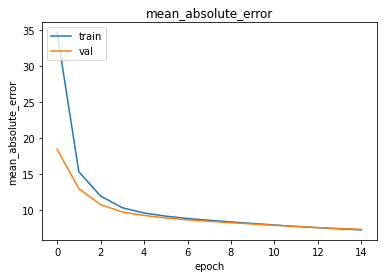

In [41]:
report.plot_keras_metric("mean_absolute_error")

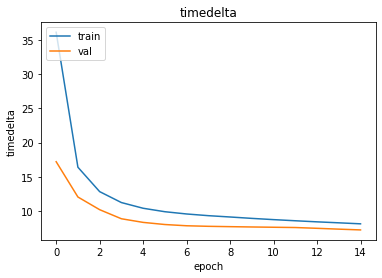

In [42]:
report.plot_keras_metric("timedelta")

In [11]:
model_arc[5].summary()

Model: "retention_time_predictor_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
string_lookup_5 (StringLooku multiple                  0         
_________________________________________________________________
embedding_5 (Embedding)      multiple                  352       
_________________________________________________________________
sequential_10 (Sequential)   (None, 14, 512)           406272    
_________________________________________________________________
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
sequential_11 (Sequential)   (None, 64)                925888    
_________________________________________________________________
dense_17 (Dense)             multiple                  65        
Total params: 1,332,577
Trainable params: 1,332,577
Non-trainable params: 0
______________________________

## 4. Conclusion



### A. Embeddings

Here we change the dimensions of the vector to represent the embedding of our input. We change the values from minimum value of 1 to 25 to see how this affects our training. We can see that when we under-represent our input the model won't reach the same accuracy as our original model (16 is number used the original model), but when we increase more than what needed to represent our input we won't improve our model. The goal here is to reach the balance where we find the least number of dims needed to represent (embed) our input.

### B. Model Arcitecture

We use two kinds of layers fro our encoding layer once we use lstm and the other type is convolutional layer. LSTM is useful when there is an emphasis on the long relations between amino acids further apart from each other, since this is not the case here as for iRT prediction we don't need such information and there are more parameters and more fully connected layers in the conv1d model we see that the conv1d model is better in prediction accuracy.